Example with temperature data

Description of this report:

Description of the table
The first line shows the difference (relative or absolute, accordingto the variable analyzed) between the QM method and the observed datain the historical period. For precipitation, a value of 1 means thatthe mean precipitation of the observed data and QM series are the samefor the historical period. For temperature, this is achieved with avalue of 0. The second line shows the headers of the periods reported.Remember that the moving window is centered in the period and itslength is equal to the length of the historical period. The first column (Hist.) shows the difference between the future and thehistorical period. The next columns show the difference between thecorresponding period and the historical period. The third and thefollowing lines show the difference in each period for thecorresponding series. As a general rule, it is desirable that thedifference between the future periods and the historica

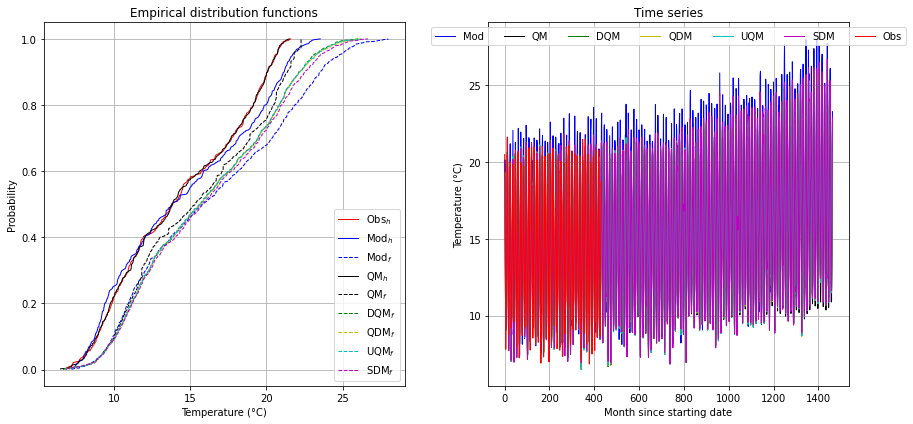

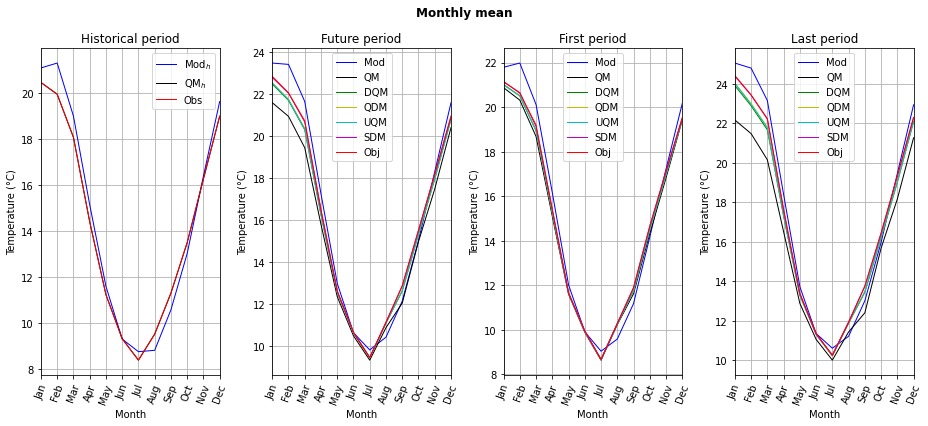

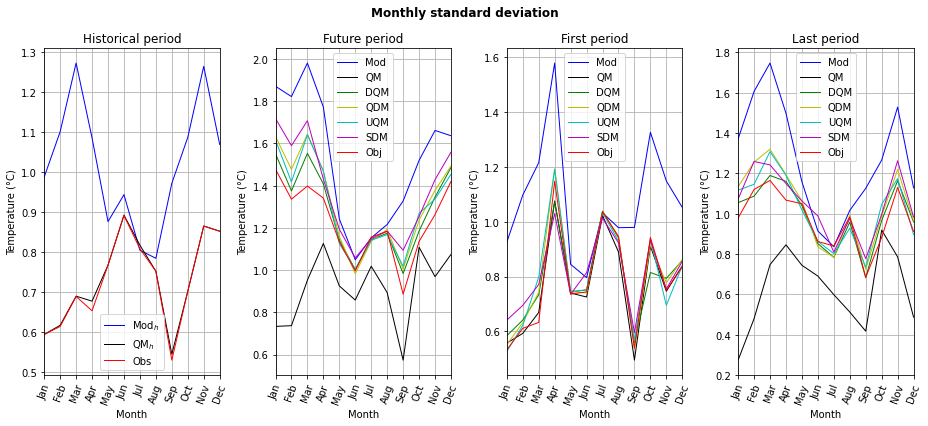

In [1]:
from climQMBC.methods import QM, DQM, QDM, UQM, SDM
from climQMBC.report import report
import pandas as pd
import numpy as np

var_name = ['tmax','pp']
var = 0
print('Example with temperature data\n')
# Load observed and model data. Remember that for temperature, var = 0, and
# for precipitation, var = 1.
obs = np.array(pd.read_csv('../Sample_data/obs_'+var_name[var]+'.csv',header=None))
mod = np.array(pd.read_csv('../Sample_data/mod_'+var_name[var]+'.csv',header=None))


# Example 1
# Example 1 shows how to use the report function with the minimum number
# of inputs. The five methods available in the climQMBC package will be
# reported, and the future projected windows displayed are the first
# period after the historical period and the last period before the end
# of the modeled period. Remember that the projected periods length is
# equal to the length of the historical period.

QM_series,DQM_series,QDM_series,UQM_series,SDM_series = report(obs, mod, var)

Example with precipitation data

Description of this report:

Description of the table
The first line shows the difference (relative or absolute, accordingto the variable analyzed) between the QM method and the observed datain the historical period. For precipitation, a value of 1 means thatthe mean precipitation of the observed data and QM series are the samefor the historical period. For temperature, this is achieved with avalue of 0. The second line shows the headers of the periods reported.Remember that the moving window is centered in the period and itslength is equal to the length of the historical period. The first column (Hist.) shows the difference between the future and thehistorical period. The next columns show the difference between thecorresponding period and the historical period. The third and thefollowing lines show the difference in each period for thecorresponding series. As a general rule, it is desirable that thedifference between the future periods and the histori

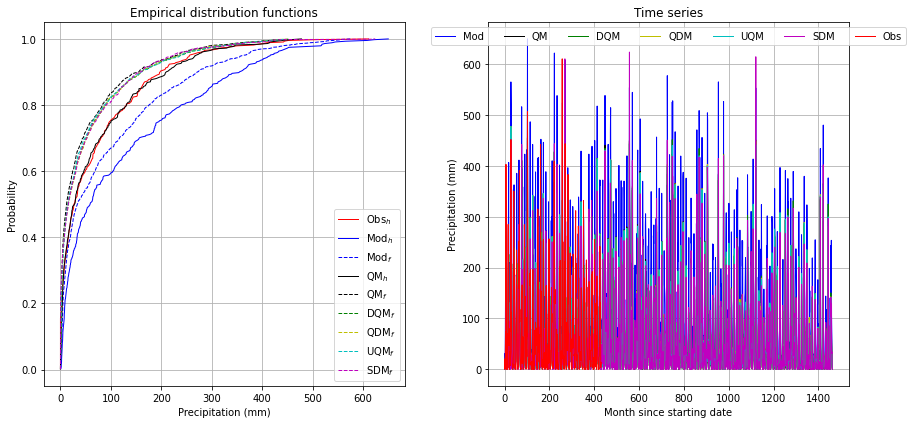

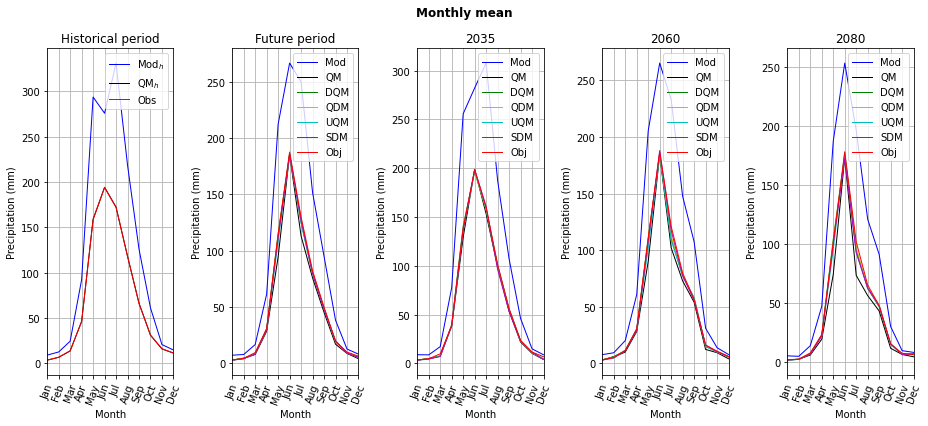

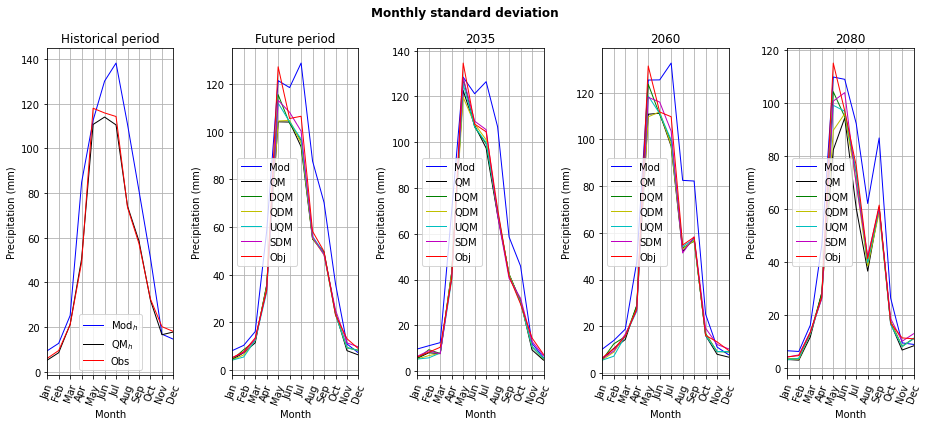

In [2]:
var = 1
print('Example with precipitation data\n')

# Load observed and model data. Remember that for temperature, var = 0, and
# for precipitation, var = 1.
obs = np.array(pd.read_csv('../Sample_data/obs_'+var_name[var]+'.csv',header=None))
mod = np.array(pd.read_csv('../Sample_data/mod_'+var_name[var]+'.csv',header=None))

# Example 2
# Example 2 shows how to use the report function for specific bias
# correction methods and projected periods. The Quantile Delta Mapping
# (QDM), Unbiased Quantile Mapping (UQM), and Scaled Distribution Mapping
# (SDM) methods will be reported. The report will analyze the projected

QM_series,DQM_series,QDM_series,UQM_series,SDM_series = report(obs, mod, var,y_init = 1979,y_wind = [2035,2060,2080])

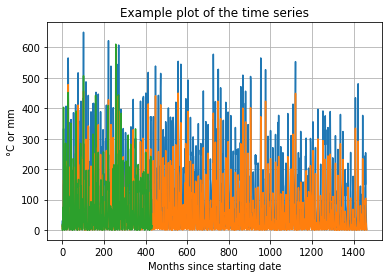

In [3]:
import matplotlib.pylab as plt
# Example 3
# Example 3 shows how each bias correction method available in the
# climQMBC package should be called. The outputs of each function are
# columns vector with monthly corrected data.

frq = 'M' # 'M' for monthly data; 'A' for annually data
QM_series = QM(obs,mod,var,frq)
DQM_series = DQM(obs,mod,var,frq)
QDM_series = QDM(obs,mod,var,frq)
UQM_series = UQM(obs,mod,var,frq)
SDM_series = SDM(obs,mod,var,frq)
QM_series = QM(obs,mod,var)

plt.figure()
plt.title('Example plot of the time series')
plt.grid()
plt.plot(mod)
plt.plot(QM_series)
plt.plot(obs)
plt.xlabel('Months since starting date')
plt.ylabel('°C or mm')
plt.show()